<center>

## Aprendizaje No Supervisado 
    Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones Edición 2021


#### Integrantes

    Devesa, María Roberta
    Feldfeber, Ivana
    Finzi, Nadia
    Kinigsberg, Ezequiel
    Villafañe, Roxana Noelia


* Página web de la materia: https://sites.google.com/view/aprendizaje-no-supervisado/
* Repositorio GitHub de la materia: https://github.com/DiploDatos/AprendizajeNOSupervisado


#### Consignas

Utilizar la base de jugadores “players_21.csv” disponible en la página de Kaggle https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv. Considerar que la base 2021 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019 (Basarse en las notebooks ntb_clustering_1_fifa2019_Colab, ntb_clustering_2_fifa2019_Colab y ntb3_embeddings_fifa2019_Colab). Realicen comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio (sintético, no muy extenso) .

2- Evaluación visual e intuitiva de a dos variables por vez.

3- Uso de técnicas de clustering: k-Medias, Mean Shift y Alguna jerárquica (sugerencia: usar 'cityblock' como distancia en el jerárquico).

4- Análisis de los clusters encontrados.

5- Embeddings y técnicas de clustering.

6- Evaluación.

7- Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué?

**Seteo del entorno**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
from sklearn import metrics


**Ingreso de la base de datos**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/data-datum/05.aprendizaje-no-supervisado/main/players_21.csv")
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,...,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,...,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,...,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3


In [ ]:
df_sin_arqueros = df[~df.player_positions.str.contains("GK")]

# 1. Análisis Exploratorio (sintético)

In [ ]:
print(df.columns)
print(len(df.columns))

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)
106


In [ ]:
print(df.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_ba

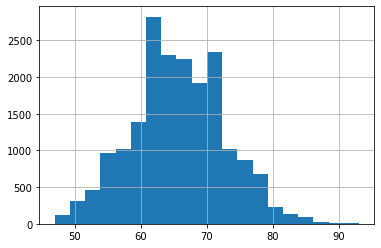

In [ ]:
df['overall'].hist(bins = 20)

In [ ]:
best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions','short_name','overall']]
best_players_per_position.head(20)

,player_positions,short_name,overall
340,CAM,Jonathan Viera,81
1032,"CAM, CDM",Borja Valero,77
2954,"CAM, CDM, CM",L. Zuffi,73
13364,"CAM, CDM, LM",J. Flores,62
90,"CAM, CF",M. Reus,85
1905,"CAM, CF, CM",D. Didavi,75
15190,"CAM, CF, LM",M. Eberwein,60
5608,"CAM, CF, RM",K. Miyoshi,69
1340,"CAM, CF, RW",G. Martínez,76
51,"CAM, CF, ST",A. Gómez,86


In [ ]:
pd.DataFrame(df.player_positions.value_counts().sort_index())

,player_positions
CAM,268
"CAM, CDM",13
"CAM, CDM, CM",4
"CAM, CDM, LM",1
"CAM, CF",23
"CAM, CF, CM",8
"CAM, CF, LM",1
"CAM, CF, RM",3
"CAM, CF, RW",2
"CAM, CF, ST",11


In [ ]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

,club_name,overall
216,FC Bayern München,81.045455
489,Real Madrid,79.250000
131,Chelsea,79.212121
214,FC Barcelona,78.909091
374,Liverpool,78.575758
330,Inter,78.000000
387,Manchester United,77.818182
386,Manchester City,77.484848




---



---



In [ ]:
n=10000 #cantidad de jugadores a considerar

df_n=df_sin_arqueros.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]


skills_ratings = ['attacking_crossing','attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 
                  'movement_sprint_speed','movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
                  'power_stamina','power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
                  'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_standing_tackle','defending_sliding_tackle']

"""
Sacamos las skills de arqueros
 'goalkeeping_diving', 
 'goalkeeping_handling', 
 'goalkeeping_kicking', 
 'goalkeeping_positioning',
 'goalkeeping_reflexes']
"""

print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

28 variables numéricas de desempeño según habilidad


In [ ]:
# # Jugador inventado excelente en todos los skills
# MachineGunDict={'Name':'MachineGun','Overall':99}
# for skills in skills_ratings:
#     MachineGunDict[skills]=99
    
# df_n=df_n.append(MachineGunDict,ignore_index=True)

In [ ]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [ ]:
df_skills.isnull().sum().sum()

0

In [ ]:
df_skills.shape

(4068, 28)

# 2. Evaluación visual e intuitiva de a dos variables por vez.

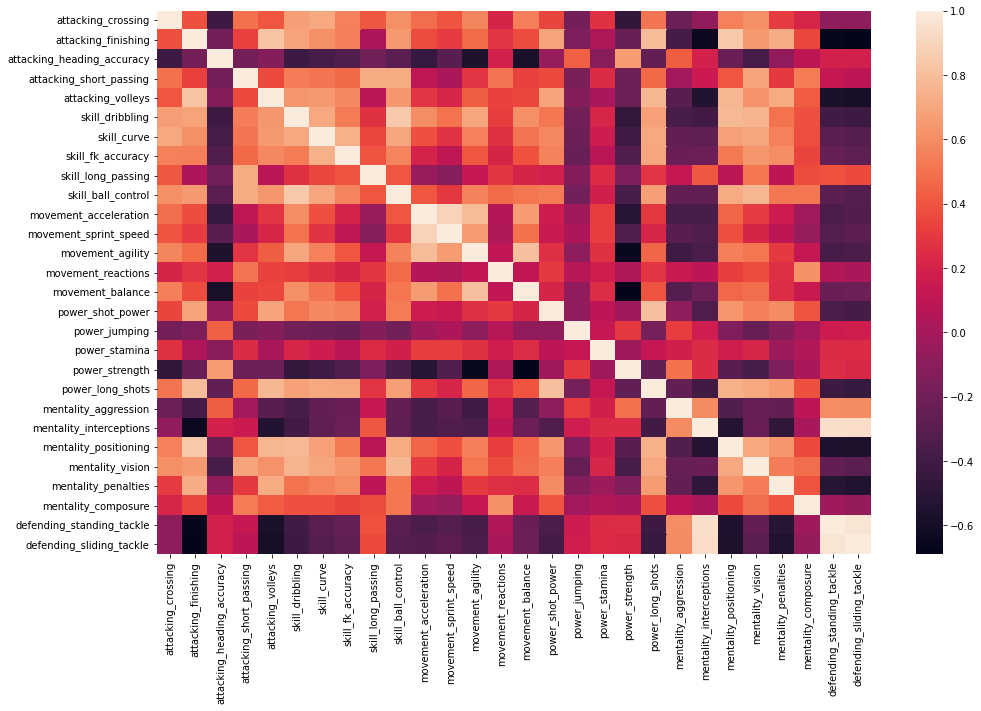

In [ ]:
#df_skills.corr()
plt.figure(figsize=(16,10))
sns.heatmap( df_skills.corr())

In [ ]:
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elegimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]
skill_2=skills_ratings[25]

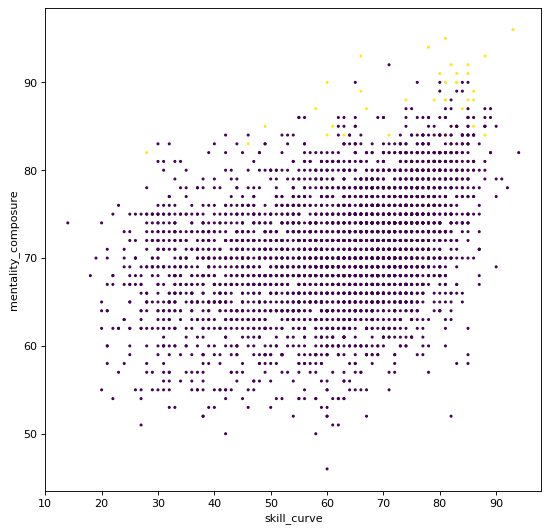

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack, )
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [ ]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=700,height=700)

fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.show(renderer="colab")

In [ ]:
#P/Gráfico 2

#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 

bool_crack=df_n["overall"] > 85
bool_elecc=df_n["club_name"]=='FC Barcelona' 
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]  #6
skill_2=skills_ratings[25]  #25

In [ ]:
palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
df_skills.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24
1,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24
3,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19
4,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29
5,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,74,91,76,66,88,94,84,91,65,53


In [ ]:
missing_values_count = df_skills.isnull().sum()
missing_values_count[missing_values_count > 0] 

Series([], dtype: int64)

# 3. Técnicas de clustering


## KMeans

El algoritmo KMeans agrupa los datos tratando de separar muestras en n grupos de varianza igual, minimizando un criterio conocido como inercia o suma de cuadrados dentro del grupo. Este algoritmo requiere que se especifique el número de clústeres. Se adapta bien a una gran cantidad de muestras y se ha utilizado en una amplia gama de áreas de aplicación en muchos campos diferentes.

**Ingreso librerias**

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [ ]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  8318821.806182148


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

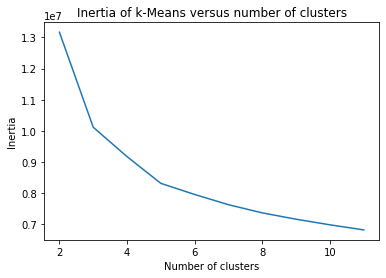

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[1]
skill_2=skills_ratings[19]

In [ ]:
df_n

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,...,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,...,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,...,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,...,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,English Premier League,1.0,91,91,87000000,3

In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                            mode='markers',
                            text=df_n.loc[:, 'short_name'],
                            marker=dict(
                                size=5,
                                # set color equal to a variable
                                color=clusters.astype(np.float),
                                colorscale='Portland',
                                showscale=False)
                            )

crack = go.Scatter(x=df_skills.loc[bool_crack, skill_1], y=df_skills.loc[bool_crack, skill_2], name='Ckacks!!',
                   text=df_n.loc[bool_crack, 'short_name'],
                   textfont=dict(family='sans serif', size=10, color='black'),
                   opacity=0.9, mode='text')

data = [kmean_clusters, crack]

layout = go.Layout(title="Clustering K means ", titlefont=dict(size=20),
                   xaxis=dict(title=skill_1),
                   yaxis=dict(title=skill_2),
                   autosize=False, width=1000, height=650)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab:
fig.show(renderer="colab")

In [ ]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad




## Clustering Mean Shift

La técnica de Mean Shift tiene como objetivo descubrir "manchas" en una densidad uniforme de muestras. Es un algoritmo basado en centroides, que funciona actualizando candidatos para centroides para que sean la media de los puntos dentro de una región determinada. Luego, estos candidatos se filtran en una etapa de posprocesamiento para eliminar casi duplicados para formar el conjunto final de centroides.

La siembra (seeding) se realiza mediante una técnica de agrupamiento para la escalabilidad.

Fuente: https://scikit-learn.org/stable/modules/clustering.html#mean-shift


In [ ]:
ms = MeanShift(bandwidth= 2, bin_seeding=True)
#ms = MeanShift(n_jobs=-1)
ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 4067


In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[14]

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], 
                                y=df_skills[skill_2], 
                                mode='markers', 
                                text=df_n.loc[:,'short_name'], 
                                marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
#$df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  5 clusters, nosotros lo forzamos
Mean shift encontró  4067 clusters, según los hiperparámetros elegidos


## Hierarchical Clustering (Método complete con City Block)



https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#ms = MeanShift(bandwidth=2, bin_seeding=True)
#ms.fit(df_skills)


cluster = AgglomerativeClustering(affinity='manhattan', linkage= 'complete' , n_clusters= None, distance_threshold=1000)
cluster.fit(df_skills)



clusters2 = cluster.labels_
cluster_centers = cluster.n_clusters_

labels_unique = np.unique(clusters2)
n_clusters = len(labels_unique)

print("Cantidad de clusters encontrados: %d" % n_clusters)

Cantidad de clusters encontrados: 2


In [ ]:
bool_crack = df_n["overall"] > 85
bool_no_crack = df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1 = skills_ratings[1]
skill_2 = skills_ratings[22]

In [ ]:
data=[]
complete_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[complete_clusters,crack]

layout = go.Layout(title="Complete CityBlock Agglomerative",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

# 4. Análisis de los clusters encontrados.

## KMeans

### Análisis por silueta

In [ ]:
label=km.predict(df_skills)
print(f'Silhouette Score(n=5): {silhouette_score(df_skills, label)}')

Silhouette Score(n=5): 0.18577977802587917


Se eligieron las 2 primeras variables para los gráficos

For n_clusters = 2 The average silhouette_score is : 0.29267868521467744
For n_clusters = 3 The average silhouette_score is : 0.2650647986273005
For n_clusters = 4 The average silhouette_score is : 0.22921592054074744
For n_clusters = 5 The average silhouette_score is : 0.18577977802587917
For n_clusters = 6 The average silhouette_score is : 0.17322872058221037


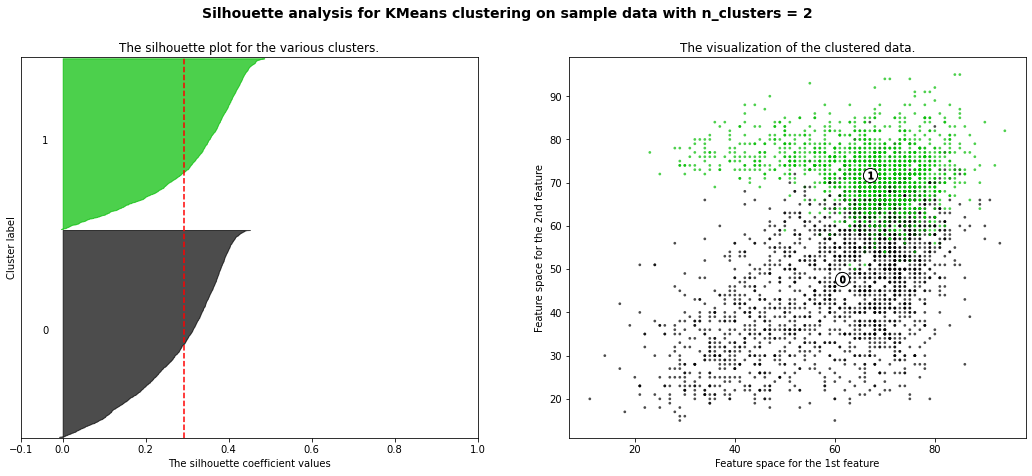

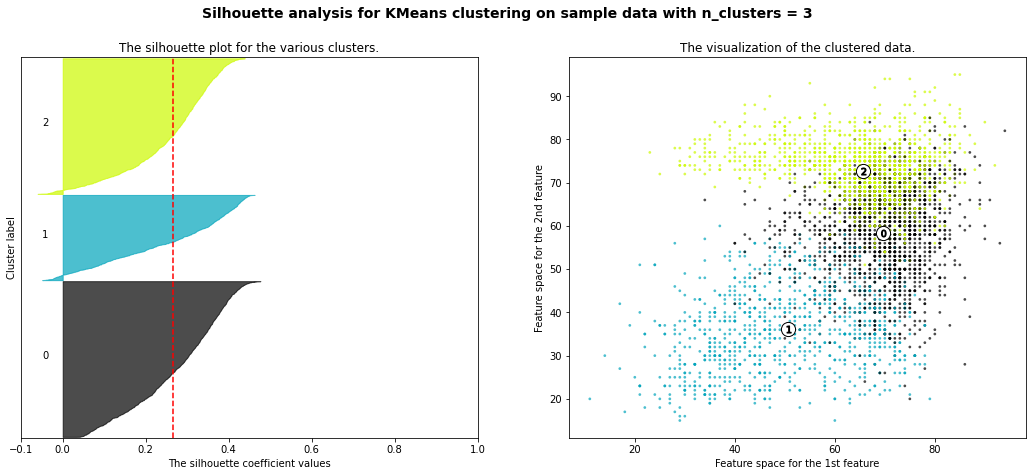

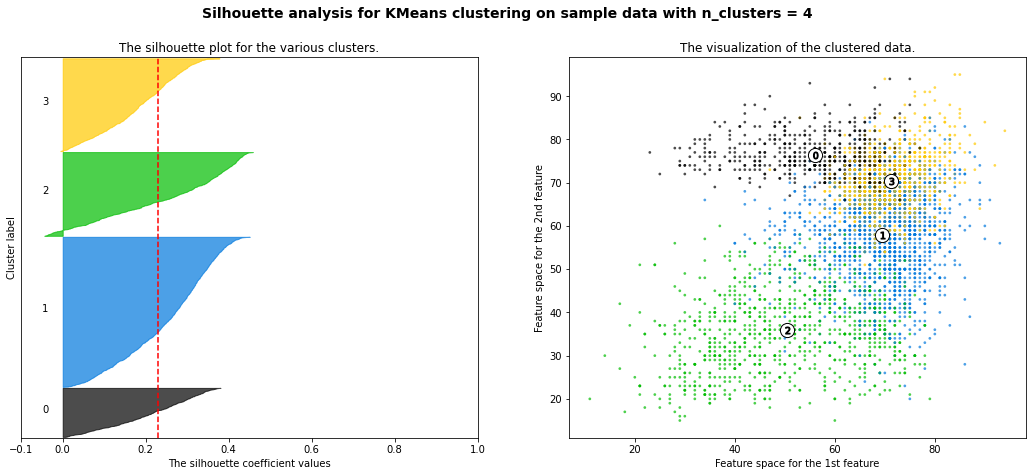

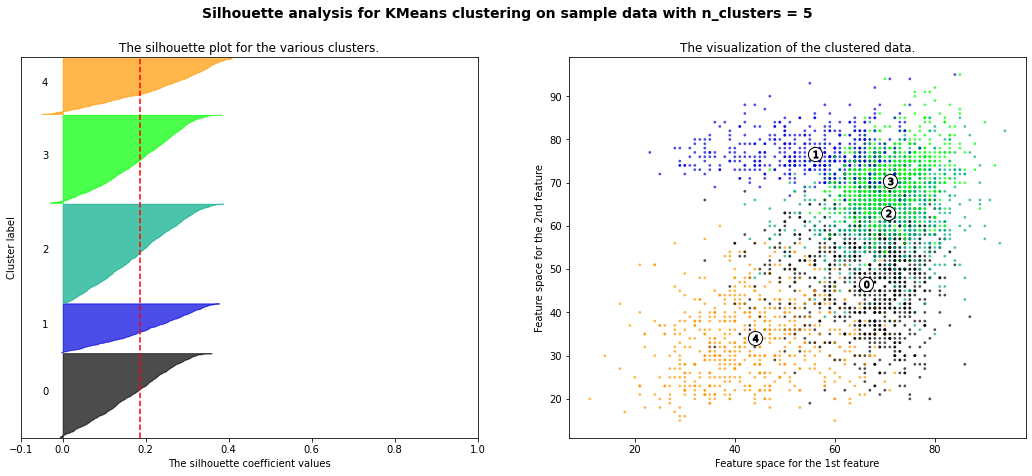

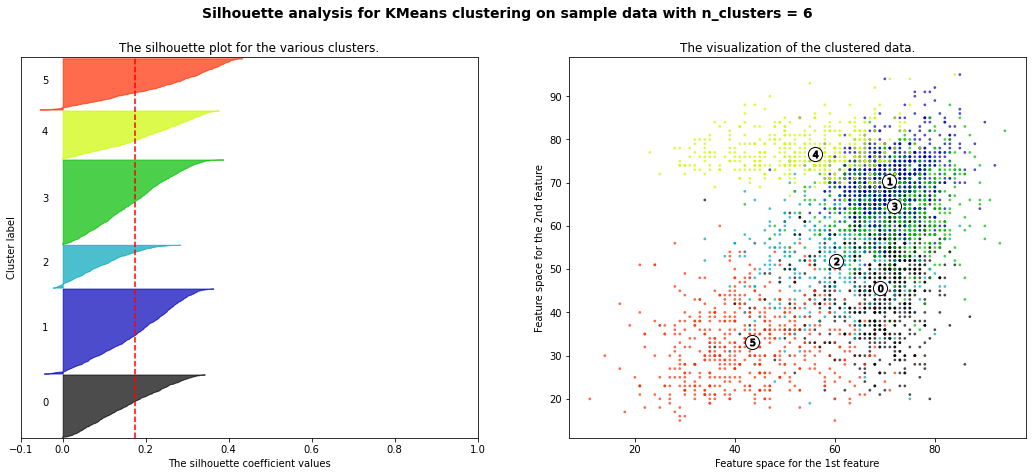

In [ ]:
#@title

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_skills)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_skills.iloc[:, 0], df_skills.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Fuente: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

### Conclusión

Lo que concluimos es que para 3, 4 y 6 clusters hay siluetas que se distancian bastante del promedio general, lo cual no es un buen indicador de homogeneidad dentro del cluster. 

Esto no sucede en los casos de 2 y 5 clusters, por lo cual cualquiera de ellos podría ser un valor óptimo aplicando el método k-means.

## Mean Shift

### Análisis por silueta


In [ ]:
#label=km.predict(df_skills)
print(f'Silhouette Score(n=4068): {silhouette_score(df_skills, clusters2)}')

Silhouette Score(n=4068): 0.0004421600762457194


### Conclusión

Inicialmente dejamos que el modelo encontrara la cantidad óptima de clusters pero observamos que terminó definiendo 4067 labels distintos, cuando la cantidad total de observaciones era 4068. Con lo cual, no logra aprender las diferencias y similitudes entre las instancias. Por tanto, puede hacer 1 único y gran cluster, porque no puede diferenciarlos, o hace uno por cada elemento. 

Entendemos entonces que este método underfittea y no es conveniente su aplicación para el dataset dado. 

También observamos que la métrica de silueta daba demasiado baja (muy cercano a 0), cuando en los otros métodos obtuvimos valores cercanos a 0.2.

## Hierarchical Clustering

### Análisis por diversas métricas

In [ ]:
true_labels = df_n.team_position.fillna('Otro')
true_labels.nunique()

29

In [ ]:
AC = AgglomerativeClustering(affinity='manhattan', linkage= 'complete' , n_clusters= 10)
AC.fit(df_skills)
labels = AC.labels_


print('Estimated number of clusters: %d' % n_clusters)
#print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_labels, labels))
print("Completeness: %0.3f" % metrics.completeness_score(true_labels, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(true_labels, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(true_labels, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(true_labels, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_skills, labels))



Estimated number of clusters: 2
Homogeneity: 0.193
Completeness: 0.244
V-measure: 0.216
Adjusted Rand Index: 0.049
Adjusted Mutual Information: 0.205
Silhouette Coefficient: 0.081


Para describir estas metricas


* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html


### Análisis por dendrograma

In [ ]:
#@title
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


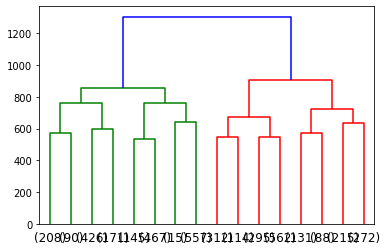

In [ ]:
plot_dendrogram(cluster, truncate_mode='level', p=3)

### Análisis por silueta

In [ ]:
print(f'Silhouette Score(n=3): {silhouette_score(df_skills, clusters2)}')

Silhouette Score(n=3): 0.2748029460554438


### Conclusión

Para el método jerárquico graficamos el "dendrograma" para determinar la cantidad óptima de clusters. 

Observamos en el mismo que la mayor distancia entre "conglomerados" sucede cuando se fusionan los dos grupos más grandes (el "verde" y el "rojo"). 

Eso vuelve a ocurrir en una distancia menor a 600, donde estaríamos contando con 16 clusters.

Por tanto, seleccionamos como cantidad óptima también en este caso 2 clusters (y se confirma nuestra hipótesis inicial).

Dado esta observación gráfica, definimos como treshold el valor 1.000 y en consecuencia el método jerárquico arrojó como óptima, la cantidad de 2 clusters.

# 5. Embeddings y técnicas de clustering



## t-SNE

t-SNE es una herramienta para visualizar datos de alta dimensión. Convierte las similitudes entre los puntos de datos en probabilidades conjuntas y trata de minimizar la divergencia de Kullback-Leibler entre las probabilidades conjuntas de la incrustación de baja dimensión y los datos de alta dimensión. t-SNE tiene una función de costo que no es convexa, es decir, con diferentes inicializaciones podemos obtener diferentes resultados.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
#ingresamos las librerias correspondientes
from sklearn import manifold

In [ ]:
df_skills.shape #dimensiones del dataset

(4068, 28)

In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']

def pos2(position):
    if position in forwards:
        return 'Forward'
    elif position in midfielders:
        return 'Midfielder'
    elif position in defenders:
        return 'Defender'
    else:
        return 'nan'

df_n["team_position2"]=df_n["team_position"].apply(lambda x: pos2(x))
df_n_dropped = df_n.query('team_position2 != "nan"')
df_n_dropped["team_position2"].value_counts()
df_embedd = df_skills.loc[df_n_dropped.index]

Cálculo de t-SNE

In [ ]:
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=1000)
df_tsne = tsne.fit_transform(df_embedd)
df_tsne.shape

(2441, 2)

Ploteamos t-SNE

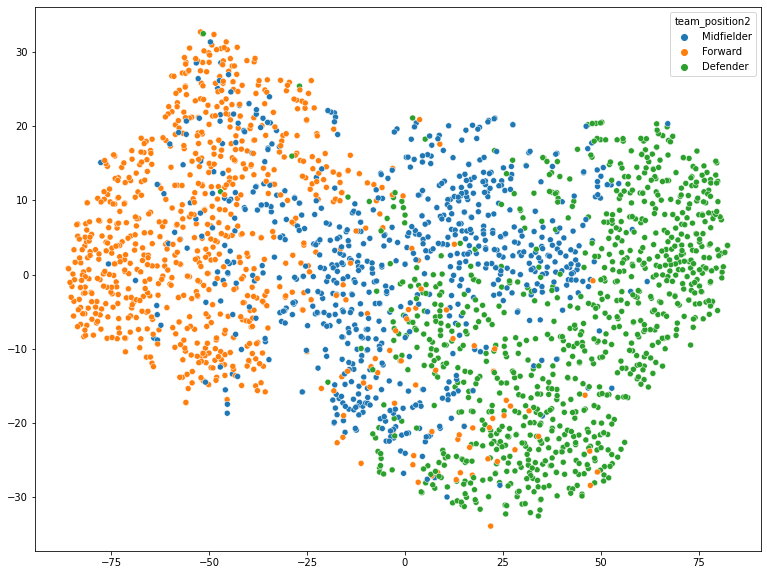

In [ ]:
plt.subplots(figsize=(13,10))
sns.scatterplot(x=df_tsne[:,0], y=df_tsne[:,1], hue=df_n_dropped['team_position2'])

## PCA

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. El método de PCA permite por lo tanto “condensar” la información aportada por múltiples variables en solo unas pocas componentes. Pertenece a las técnicas de aprendizaje no supervisado. En el caso del aprendizaje no supervisado, la variable respuesta **Y** no se tiene en cuenta ya que el objetivo no es predecir **Y** sino *extraer información empleando los predictores*, por ejemplo, para identificar subgrupos. El principal problema al que se enfrentan los métodos de aprendizaje no supervisado es la dificultad para validar los resultados dado que no se dispone de una variable respuesta que permita contrastarlos.

Fuente: https://www.cienciadedatos.net/documentos/35_principal_component_analysis

Importamos librerías

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Hacemos el escalado y el cálculo correspondiente de PCA y vemos la varianza según componente y la varianza acumulada. 

In [ ]:
df_embedd_st = StandardScaler().fit_transform(df_embedd)

pca = PCA(n_components=2).fit(df_embedd_st)
df_pca = pca.transform(df_embedd_st)
# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

print ('tamaño de los datos: ', df_pca.shape)


proporción de varianza por componente:  [0.41671552 0.14548482]
proporción de varianza por componente acumulada:  [0.41671552 0.56220034]
tamaño de los datos:  (2441, 2)


Ploteamos las componentes PC1 y PC2 correspondientes a los jugadores 

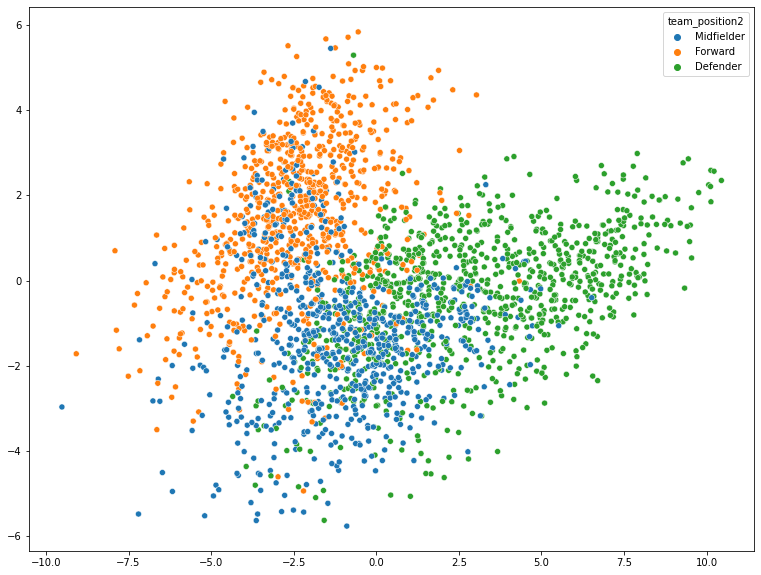

In [ ]:
plt.subplots(figsize=(13,10))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_n_dropped['team_position2'])

# ¿Se realizó alguna normalización de la base? ¿Por qué?

No se realizó ninguna normalización. Solamente se borró la columna `defending_marking` porque solo contenía `NaN`s y no permitía realizar el clusterizado. También se eliminaron a los arqueros por contener características muy distintas al resto de los jugadores. 

A pesar de que la mayoría de los modelos basados en distancia (como k-means y PCA) necesitan normalizar las variables con distintas escalas para que una no domine sobre el resto, en nuestro caso las variables se encuentran dentro de rangos similares, por lo que no creemos que sea un problema.

# Conclusión final

* Clustering: Descartamos el método de Mean Shift para este dataset, y obtuvimos como mejores valores a 2 y 5 clusters en los modelos de KMeans y Jerárquico. Creemos que esas cantidades tienen sentido si suponemos una división básica de los jugadores según "defensores" vs "delanteros", y lo mismo podría ocurrir si además los diferenciamos por "aptitud". 


* Reducción de dimensiones: En ambas técnicas de reducción de dimensiones se observan ciertos patrones de agrupamiento, PERO en ninguna se puede ver una separación nítida de los grupos. Reforzamos las cantidades óptimas de clusters obtenidas anteriormente, al haber hallado estos grupos principales:  defensor, mediocampista y delantero. Creemos que esto se debe a que las habilidades físicas que se evaluan en el dataset no son conjuntos disjuntos, es decir, un mismo jugador puede tener varias habilidades a la vez. 